In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [2]:
#Viral dynamics parameters
CL = 23
lambdaT = 2e9
deltaT = 0.02
deltaT1 = 0.5
deltaT2 = 1.4
deltaPICT = 0.35
kT = 0.35
betaT0 = 8e-12
NThat = 1000
NT = 670  #NT = 0.67*NThat
NTdiff = NThat-NT

lambdaM = 6.9e7
deltaM = 0.0069; deltaM1 = 0.0069
deltaM2 = 0.09
deltaPICM = 0.0035
kM = 0.07
betaM0 = 1e-13
NMhat = 100
NM = 67
NMdiff = NMhat-NM

In [3]:
#Estimated PK parameters
hour = 24
ka = 45.4382*hour
k10 =  0.2355*hour
k12 =  0.175*hour
k21 =  0.0259*hour
Vc =  162.690 #mL
k13 = 44.2394*hour
k30 = 0.00975*hour

#To be optimized
IC50 = 50
m = 1 #fixed

In [7]:
def ode_complex(t, z):
    Tu = z[0]; T1 = z[1]; T2 = z[2]; V = z[3] #T-cells and free infectious viruses
    Mu = z[4]; M1 = z[5]; M2 = z[6]; VN = z[7] #Macrophages and non-infectious viruses
    Z0 = z[8]; Z1 = z[9]; Z2 = z[10]; Z3 = z[11] 
    #Viral dnymacics model
    dTu = lambdaT - deltaT*Tu - betaT(Z3)*V*Tu + deltaPICT*T1
    dMu = lambdaM - deltaM*Mu - betaM(Z3)*V*Mu + deltaPICM*M1
    dT1 = betaT(Z3)*V*Tu - (deltaT1 + kT + deltaPICT)*T1
    dM1 = betaM(Z3)*V*Mu - (deltaM1 + kM + deltaPICM)*M1
    dT2 = kT*T1 - deltaT2*T2
    dM2 = kM*M1 - deltaM2*M2 
    dV = NM*M2 + NT*T2 - V*(CL + (betaT(Z3)+CLT(Z3))*Tu + (CLM(Z3) + betaM(Z3))*Mu)
    dVN = (NTdiff*T2 + NMdiff*M2) - CL*VN
    #Compartment model
    dZ0 = -ka*Z0
    dZ1 = (ka/Vc)*Z0 - k10*Z1 - k12*Z1 + k21*Z2
    dZ2 = k12*Z1 - k21*Z2
    dZ3 = k13*Z1 - k30*Z3
    d = [dTu,dT1,dT2,dV,dMu,dM1,dM2,dVN,dZ0,dZ1,dZ2,dZ3]
    return d

def eta(D): 
    return D**m/(IC50**m + D**m)

def betaT(t):
    return betaT0*(1-eta(t))
                
def CLT(t):
    return (1 + eta(t))*betaT0

def betaM(t):
    return betaM0*(1-eta(t))
                
def CLM(t):
    return (1 + eta(t))*betaM0

def solve_ode(z0, t_obs):
    #solve ODE for a single data set
    z = z0
    res = solve_ivp(ode_complex, (tstart,tfinal), z, t_eval=t_obs)
    return res

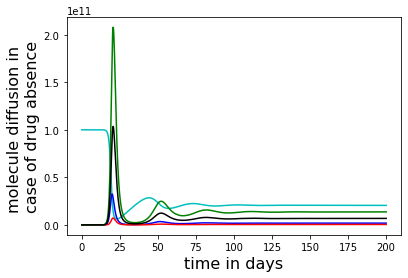

Steady states
Tu cells:  20521975484.695423
T1 cells:  1871843034.3127716
T2 cells:  467974209.5123621
infectious Viruses:  13690540081.832031
non-infectious Viruses:  6834284839.026645

Mu cells:  6764846776.601595
M1 cells:  111822300.88519625
M2 cells:  84484727.48236099


In [8]:
#Global parameters  
tstart = 0; tfinal = 200 #initial and final time points
times = np.linspace(tstart, tfinal, num = 1000)

dose = 0 #drug absence
z0 = [lambdaT/deltaT,0,0,10,0,0,0,0,dose,0,0,0] #initial state of the system


res = solve_ode(z0,times)
#Steady states
Tucells = res.y[0]
T1cells = res.y[1]
T2cells = res.y[2]
Viruses = res.y[3]
Mucells = res.y[4]
M1cells = res.y[5]
M2cells = res.y[6]
VNIs = res.y[7]

# plot result
plt.plot(res.t, Tucells, 'c-')
plt.plot(res.t, T1cells , 'b-')
plt.plot(res.t, T2cells , 'r-')
plt.plot(res.t, Viruses, 'g-')
plt.plot(res.t, VNIs,'k-')
plt.xlabel('time in days', fontsize=16)
plt.ylabel('molecule diffusion in \ncase of drug absence', fontsize=16)
plt.plot()    
plt.show()
#print steady states
print('Steady states')
print('Tu cells: ', Tucells[-1:][0])
print('T1 cells: ', T1cells[-1:][0])
print('T2 cells: ', T2cells[-1:][0])
print('infectious Viruses: ', Viruses[-1:][0])
print('non-infectious Viruses: ', VNIs[-1:][0])
print()
print('Mu cells: ', Mucells[-1:][0])
print('M1 cells: ', M1cells[-1:][0])
print('M2 cells: ', M2cells[-1:][0])